# Demo: Cross-Image Attention for Zero-Shot Appearance Transfer
<b>Paper:</b> https://arxiv.org/abs/2311.03335  
<b>Project Page:</b> https://garibida.github.io/cross-image-attention/   
<b>Code:</b> https://github.com/garibida/cross-image-attention

<a href="https://colab.research.google.com/github/garibida/cross-image-attention/blob/main/notebooks/demo.ipynb"><img align="left" title="Open in Colab" src="https://colab.research.google.com/assets/colab-badge.svg"></a>

In [26]:
#@title Step 1: Setup { display-mode: "form" }

import os
os.chdir('/media/allenyljiang/564AFA804AFA5BE51/Codes/')
CODE_DIR = 'cross-image-attention'

!git clone https://github.com/garibida/cross-image-attention.git $CODE_DIR

os.chdir(f'./{CODE_DIR}')

# !pip install -r environment/requirements.txt

%load_ext autoreload
%autoreload 2

fatal: destination path 'cross-image-attention' already exists and is not an empty directory.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import os
os.chdir('/media/allenyljiang/564AFA804AFA5BE51/Codes/cross-image-attention')
import config # 必须先导入才能重新导入
import importlib
importlib.reload(config)
import run
importlib.reload(run)

from run import run
# from config import RunConfig

: 

In [20]:
#@title Step 2: Import Packages { display-mode: "form" }
import os
os.chdir('/media/allenyljiang/564AFA804AFA5BE51/Codes/cross-image-attention')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import torch
from pathlib import Path
from PIL import Image
from IPython.display import display
from config import RunConfig

from run import run

## ablations

Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Done.
Inverting images...


100%|██████████| 100/100 [00:20<00:00,  4.86it/s]


Done.
Running appearance transfer...


100%|██████████| 68/68 [00:43<00:00,  1.56it/s]


Done.


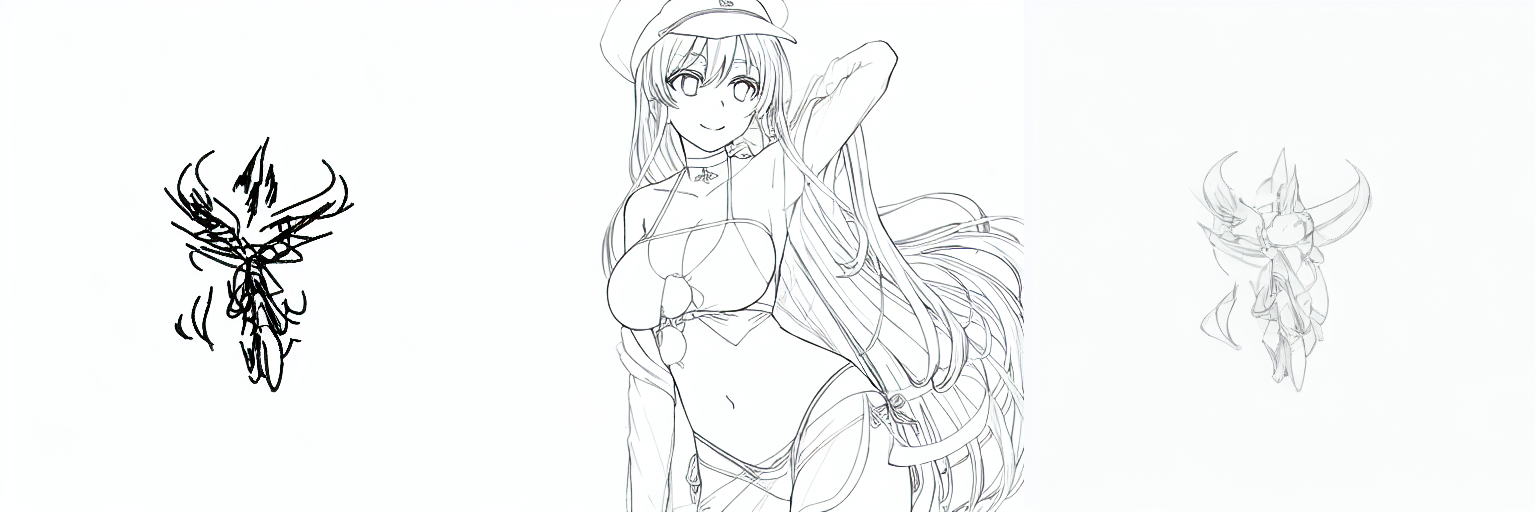

In [25]:
#@title Choose your images  { display-mode: "form" }
# app_image_path = "/content/cross-image-attention/notebooks/inputs/input_zebra.png"  # @param {type: "string"}
app_image_path = "/media/allenyljiang/564AFA804AFA5BE51/Codes/StyleID/data/style_sketch/ref_sample1.jpg"  # @param {type: "string"}
# struct_image_path = "/content/cross-image-attention/notebooks/inputs/input_giraffe.png"  # @param {type: "string"}
struct_image_path = "/media/allenyljiang/564AFA804AFA5BE51/Codes/StyleID/data/cnt_diff3ds/iter59.png" # content
domain_name = "animal" # @param {type: "string"}
seed = 42  # @param {type:"integer"}
from pathlib import Path
output_path = Path("/media/allenyljiang/564AFA804AFA5BE51/Codes/cross-image-attention/outputs_debug/")
config = RunConfig(
    app_image_path=Path(app_image_path),
    struct_image_path=Path(struct_image_path),
    domain_name=domain_name,
    seed=seed,
    load_latents=True,
    output_path = output_path,
    use_masked_adain = True,
    contrast_strength = 1.67, # 1.67
    swap_guidance_scale = 1.0, # 3.5
    gamma = 0.75,
)

#@title Run appearance transfer  { display-mode: "form" }
images = run(cfg=config)
torch.cuda.empty_cache()
joined_images = Image.fromarray(np.concatenate(images[::-1], axis=1))
display(joined_images)

### single image

### default

In [ ]:
#@title Choose your images  { display-mode: "form" }
# app_image_path = "/content/cross-image-attention/notebooks/inputs/input_zebra.png"  # @param {type: "string"}
app_image_path = "/media/allenyljiang/564AFA804AFA5BE51/Codes/StyleID/data/style_4sketch_style/img.png"  # @param {type: "string"}
# struct_image_path = "/content/cross-image-attention/notebooks/inputs/input_giraffe.png"  # @param {type: "string"}
struct_image_path = "/media/allenyljiang/564AFA804AFA5BE51/Codes/StyleID/data/cnt_diff3ds/iter59.png" # content
domain_name = "animal" # @param {type: "string"}
seed = 42  # @param {type:"integer"}

config = RunConfig(
    app_image_path=Path(app_image_path),
    struct_image_path=Path(struct_image_path),
    domain_name=domain_name,
    seed=seed,
    load_latents=False
)

#@title Run appearance transfer  { display-mode: "form" }
images = run(cfg=config)
torch.cuda.empty_cache()
joined_images = Image.fromarray(np.concatenate(images[::-1], axis=1))
display(joined_images)

In [ ]:
root_dir = "/media/allenyljiang/564AFA804AFA5BE51/Codes/StyleID/data/style_4sketch_style"

Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Done.
Inverting images...


100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


Done.
Running appearance transfer...


100%|██████████| 68/68 [00:44<00:00,  1.53it/s]


Done.


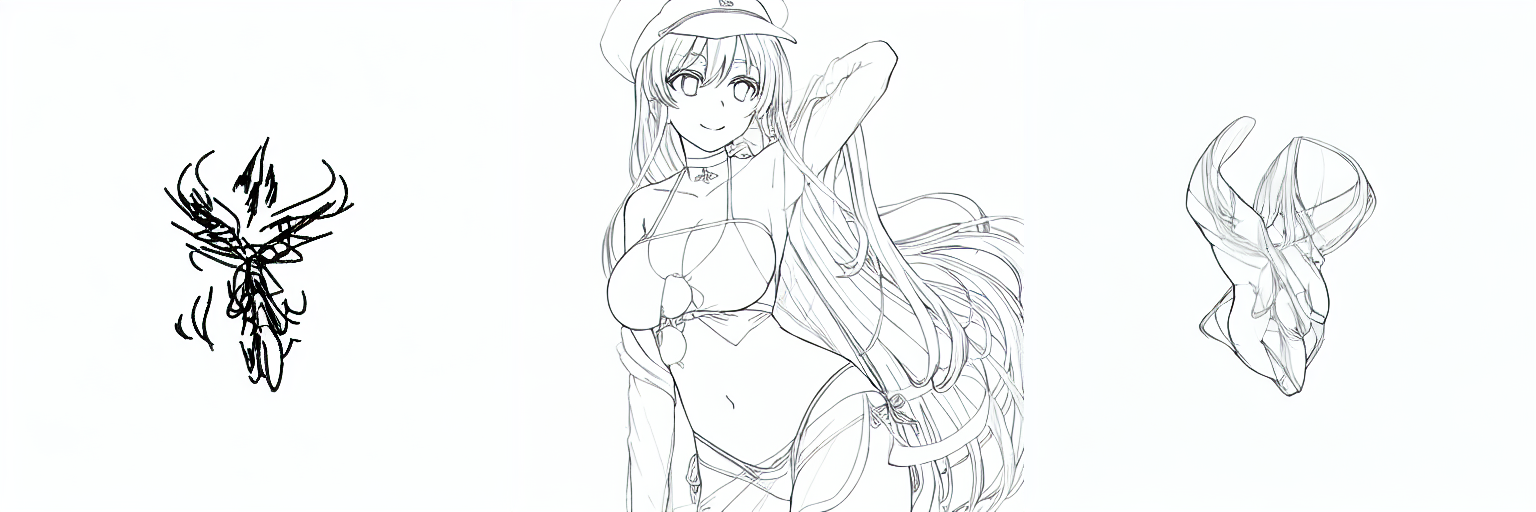

Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Done.
Inverting images...


100%|██████████| 100/100 [00:20<00:00,  4.86it/s]


Done.
Running appearance transfer...


100%|██████████| 68/68 [00:43<00:00,  1.57it/s]


Done.


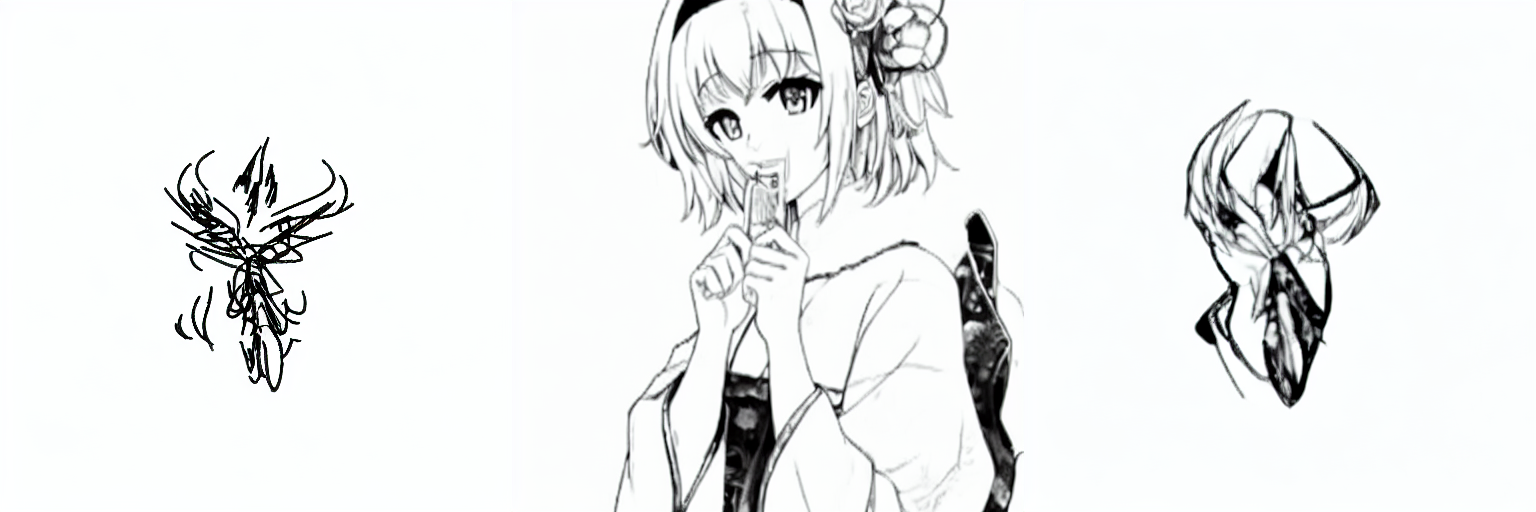

Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Done.
Inverting images...


100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


Done.
Running appearance transfer...


100%|██████████| 68/68 [00:44<00:00,  1.54it/s]


Done.


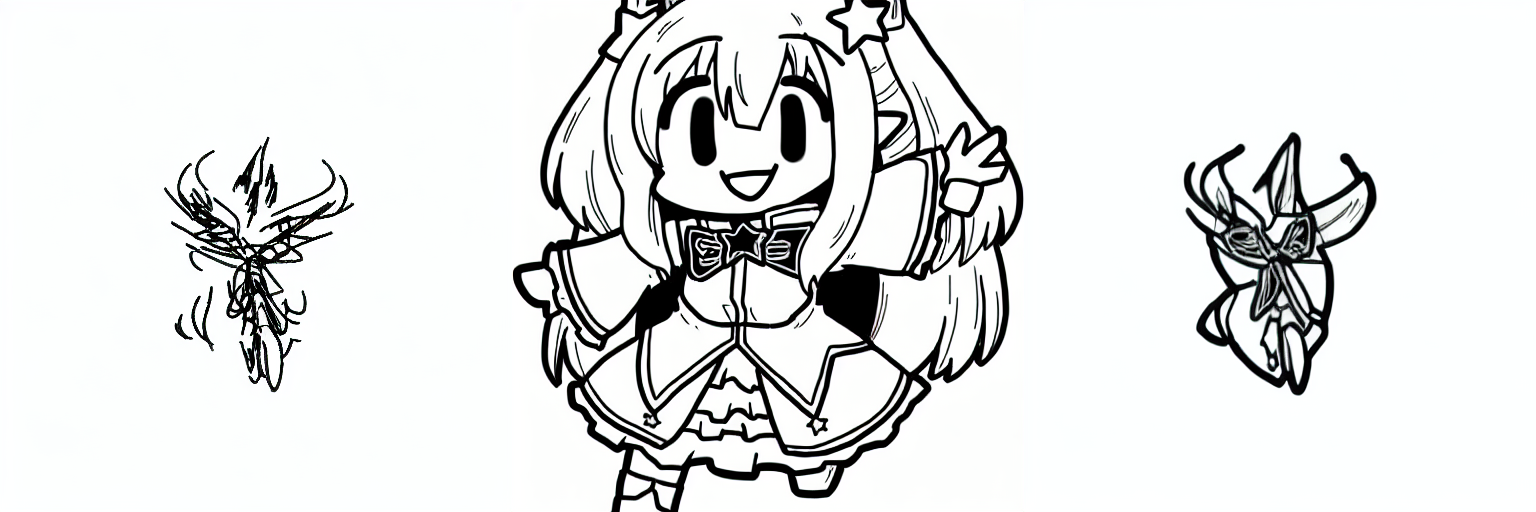

Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'models.stable_diffusion.CrossImageAttentionStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Done.
Inverting images...


100%|██████████| 100/100 [00:20<00:00,  4.86it/s]


Done.
Running appearance transfer...


100%|██████████| 68/68 [00:43<00:00,  1.55it/s]


Done.


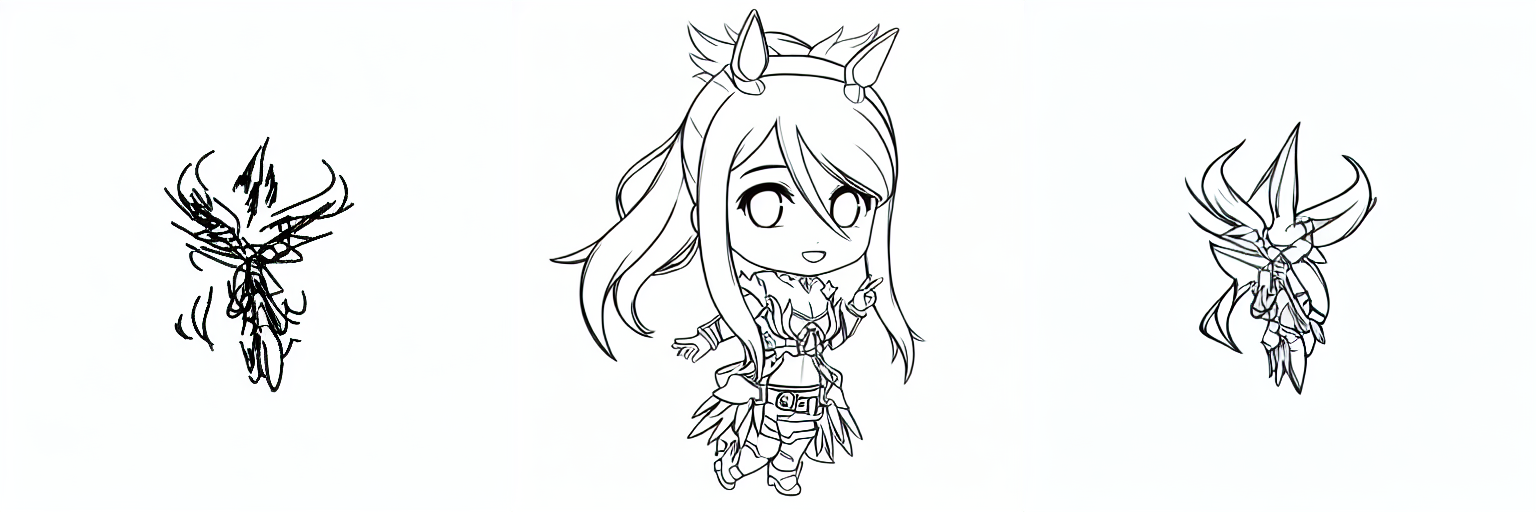

In [ ]:
for image in os.listdir(root_dir):
    #@title Choose your images  { display-mode: "form" }
    # app_image_path = "/content/cross-image-attention/notebooks/inputs/input_zebra.png"  # @param {type: "string"}
    # app_image_path = "/media/allenyljiang/564AFA804AFA5BE51/Codes/StyleID/data/style_4sketch_style/img.png"  # @param {type: "string"}
    app_image_path = os.path.join(root_dir,image)
    # struct_image_path = "/content/cross-image-attention/notebooks/inputs/input_giraffe.png"  # @param {type: "string"}
    struct_image_path = "/media/allenyljiang/564AFA804AFA5BE51/Codes/StyleID/data/cnt_diff3ds/iter59.png" # content
    domain_name = "animal" # @param {type: "string"}
    seed = 42  # @param {type:"integer"}

    config = RunConfig(
        app_image_path=Path(app_image_path),
        struct_image_path=Path(struct_image_path),
        domain_name=domain_name,
        seed=seed,
        load_latents=False
    )

    #@title Run appearance transfer  { display-mode: "form" }
    images = run(cfg=config)
    torch.cuda.empty_cache()
    joined_images = Image.fromarray(np.concatenate(images[::-1], axis=1))
    display(joined_images)